In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#BASIC

In [49]:
import numpy as np
import pandas  as pd

In [50]:
df = pd.read_csv('/content/gdrive/My Drive/ML/unMazer/listings.csv')

In [51]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [52]:
df.room_type.value_counts()

Entire home/apt    7962
Private room       2166
Shared room         133
Hotel room           11
Name: room_type, dtype: int64

In [53]:
latlong = []
for idx in df.index:
  tmp = []
  tmp.append(df['latitude'][idx])
  tmp.append(df['longitude'][idx])
  latlong.append(tmp)

df['COOR'] = pd.Series(latlong)

QUESTION 3

In [54]:
#QUESTION 3
df.groupby('host_name').sum().sort_values(by=['calculated_host_listings_count'], ascending=False).head(10)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_name,,,,,,,,,,,,
Kia,18644807504,143293022524,0.0,31337414,12064.17912,-38906.74670,47985,15580,1,0.30,129764,128019
WanderJaunt,5447104716,13664606856,0.0,10313647,3966.19883,-12804.37431,21107,131,3057,222.01,17161,21196
TurnKey Vacation Rentals,3732061011,14692642160,0.0,9760962,3755.29576,-12125.05881,38393,331,1586,55.92,7214,21244
Martin,2563205878,7138190172,0.0,7953152,3060.75639,-9870.71924,5878,2457,604,31.39,6743,26801
Renters Club,1683623527,6639692360,0.0,4407968,1695.26739,-5475.81479,65558,101,1175,43.15,3136,14527
Madalynn,2197657935,16647705696,0.0,3778126,1454.10978,-4691.78298,7565,96,189,46.48,2304,16558
Christian,1785860807,9020278832,0.0,3856453,1483.34634,-4789.60356,10049,117,274,8.05,2029,14570
Above,1653838055,9061553443,0.0,3385605,1303.67184,-4207.02501,154504,2600,13,2.39,1849,10964
Lodgewell,604610150,599734468,0.0,2990734,1150.11797,-3714.32796,13859,125,3736,63.50,1444,4411


In [55]:
!pip install shapely
!pip install geopandas
!pip install geojsonio
!pip install chart-studio

In [56]:
import geopandas as gpd
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
import plotly.express as px

In [57]:
states = gpd.read_file('/content/gdrive/My Drive/ML/unMazer/neighbourhoods.geojson')
states = states.drop(['neighbourhood_group'],axis=1)

In [58]:
from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson
import plotly.express as px
# geo_source = GeoJSONDataSource(geojson=contents)

In [59]:
states.head()

,neighbourhood,geometry
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

In [61]:
listings = df
print(listings.shape)

(10272, 17)


In [62]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'COOR'],
      dtype='object')

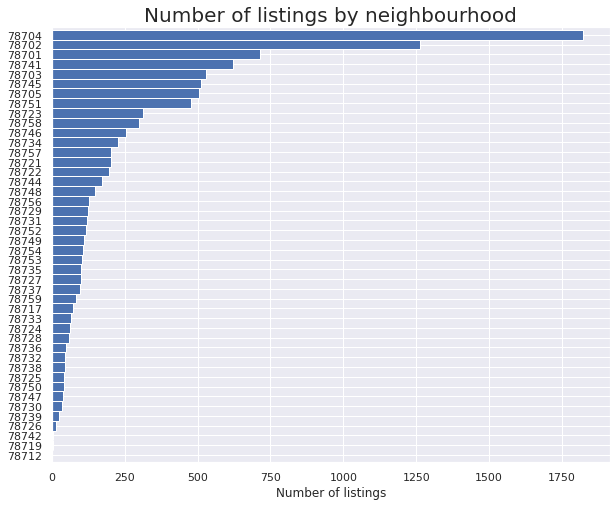

In [63]:
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [64]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[30.2672, -97.7431], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
folium.Marker(
    location=[30.2672, -97.7431],
    popup='Welcome to <b>AUSTIN</b>',
    tooltip = "Click for more"
).add_to(map1)
folium.GeoJson(data=states['geometry']).add_to(map1)
map1

# THEMATIC MAPS

In [65]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [66]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [67]:
states1 = states
states2 = states
states3 = states

QUESTION 1

In [68]:
#QUESTION 1
df_neighbourhood_grouped = df.groupby('neighbourhood').sum().sort_values(by=['calculated_host_listings_count'], ascending=False)
df_neighbourhood_grouped['neighbourhood'] = df_neighbourhood_grouped.index

In [69]:
tmp = np.zeros(df_neighbourhood_grouped.shape[0])
states1['calculated_host_listings_count'] = pd.Series(tmp)
states1.head()

,neighbourhood,geometry,calculated_host_listings_count
0,78739,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",0.0
1,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",0.0
2,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",0.0
3,78737,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",0.0
4,78756,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",0.0


In [70]:
for idx in df_neighbourhood_grouped.index:
  x = df_neighbourhood_grouped['neighbourhood'][idx]
  y = df_neighbourhood_grouped['calculated_host_listings_count'][idx]
  for idx1 in states1.index:
    if (int(states1['neighbourhood'][idx1]) == int(x)):
      states1['calculated_host_listings_count'][idx1] = y
      tmp[idx1] = y

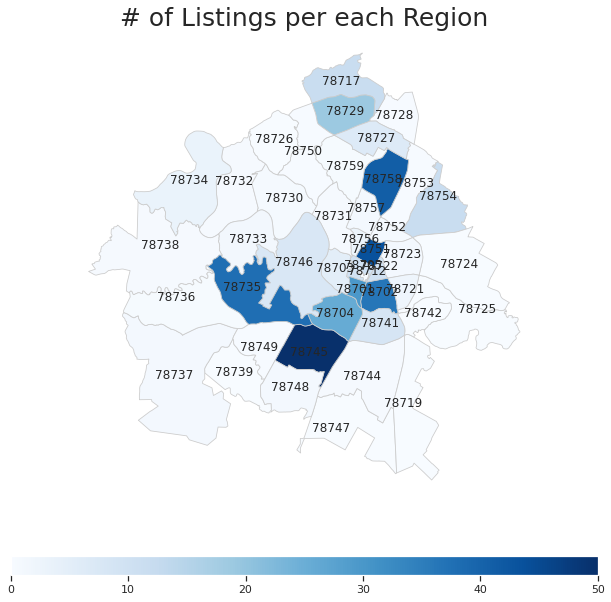

In [71]:
# set the value column that will be visualised
variable = 'calculated_host_listings_count'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('# of Listings per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)
# Add Labels
states1['coords'] = states1['geometry'].apply(lambda x: x.representative_point().coords[:])
states1['coords'] = [coords[0] for coords in states1['coords']]
for idx, row in states1.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['coords'],horizontalalignment='center')
# create map
states1.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

QUESTION 2

In [72]:
df_x = df.groupby(['neighbourhood', 'room_type']).sum().sort_values(by=['calculated_host_listings_count'], ascending=False)
df_x1= df_x
df_x1['col'] = df_x1.index
df_x1['new'] = pd.Series(np.array([]))
for idx in df_x1.index:
  df_x1['new'][idx] = df_x1['col'][idx][1]
df_x11 = df_x1[df_x1['new'] == 'Entire home/apt']
df_x12 = df_x1[df_x1['new'] != 'Entire home/apt']

In [73]:
df_x12.head()

id  ...           new
neighbourhood room_type                 ...              
78751         Shared room    909453216  ...   Shared room
              Private room  2080103091  ...  Private room
78741         Private room  4923250743  ...  Private room
78756         Shared room    198536136  ...   Shared room
78705         Private room  4141672032  ...  Private room

[5 rows x 13 columns]

In [74]:
tmp = np.zeros(df_neighbourhood_grouped.shape[0])
states2['calculated_host_listings_count'] = pd.Series(tmp)
for idx in df_neighbourhood_grouped.index:
  x = df_x11['col'][idx][0][0]
  y = df_x11['calculated_host_listings_count'][idx]
  for idx1 in states1.index:
    if (int(states2['neighbourhood'][idx1]) == int(x)):
      states2['calculated_host_listings_count'][idx1] = y
      tmp[idx1] = y

In [75]:
tmp = np.zeros(df_neighbourhood_grouped.shape[0])
states3['calculated_host_listings_count'] = pd.Series(tmp)
for idx in df_x12.index:
  x = df_x12['col'][idx][0]
  y = df_x12['calculated_host_listings_count'][idx]
  for idx1 in states3.index:
    if (int(states3['neighbourhood'][idx1]) == int(x)):
      states3['calculated_host_listings_count'][idx1] = y
      tmp[idx1] = y

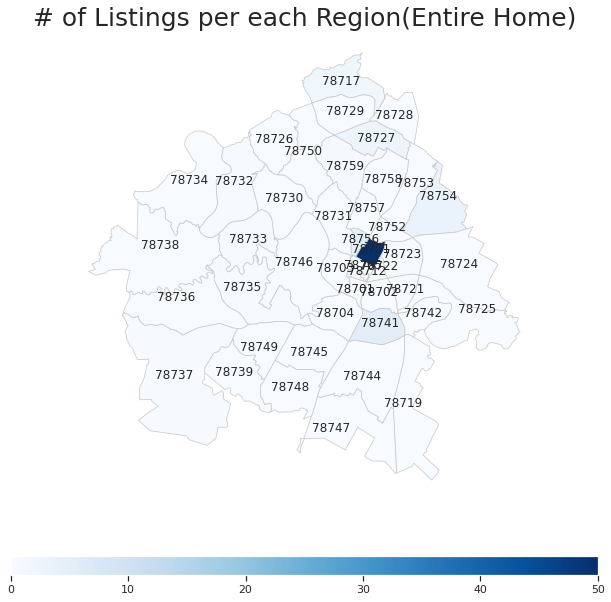

In [76]:
# set the value column that will be visualised
variable = 'calculated_host_listings_count'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('# of Listings per each Region(Entire Home)', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)
# Add Labels
states2['coords'] = states2['geometry'].apply(lambda x: x.representative_point().coords[:])
states2['coords'] = [coords[0] for coords in states2['coords']]
for idx, row in states2.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['coords'],horizontalalignment='center')
# create map
states2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

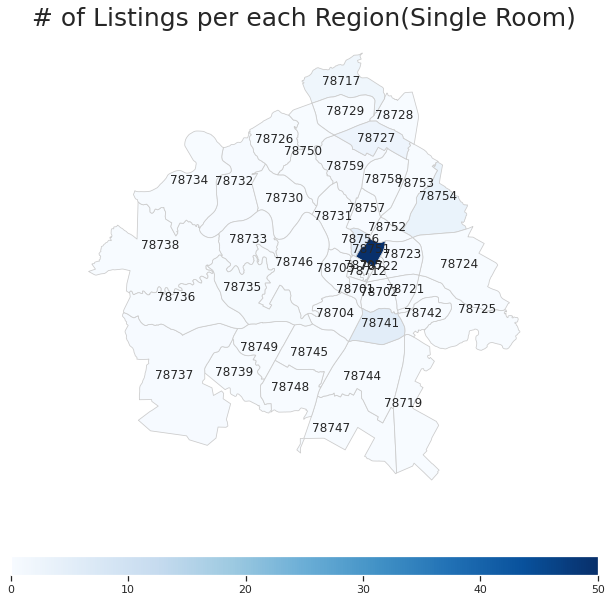

In [77]:
# set the value column that will be visualised
variable = 'calculated_host_listings_count'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('# of Listings per each Region(Single Room)', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)
# Add Labels
states3['coords'] = states3['geometry'].apply(lambda x: x.representative_point().coords[:])
states3['coords'] = [coords[0] for coords in states3['coords']]
for idx, row in states3.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['coords'],horizontalalignment='center')
# create map
states3.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

FOR CLEARER PICS 
CHANGE figsize from (30, 10) to (70, 50)



# METRIC

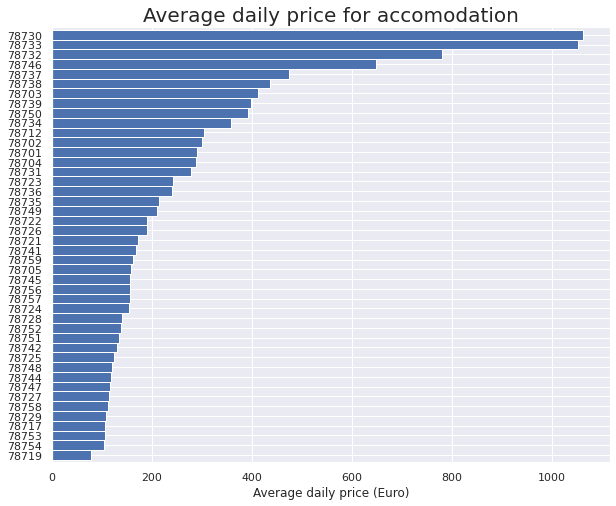

In [79]:
listings
listings = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
listings.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Average daily price for accomodation", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()